## Factor Analyses with Cross-Validation

### read data

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df0 = pd.read_csv('/content/drive/My Drive/SHQ/Data/cfa_test_df2.csv')

In [ ]:
# MinMax scaled
from sklearn.preprocessing import scale,RobustScaler,StandardScaler, MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df0)
df2 = scaler.transform(df0)
df2 = pd.DataFrame(df2,index=df0.index, columns=['age',	'gender',	'hand',	'navigating_skills',	'sleep',	'edu_level',	'commute_level',	'home_env'])
df2[:10]

,age,gender,hand,navigating_skills,sleep,edu_level,commute_level,home_env
0,0.961538,0.0,0.0,0.333333,0.636364,1.0,0.0,1.0
1,0.000000,1.0,1.0,1.000000,0.545455,0.5,1.0,1.0
2,0.057692,0.0,0.0,0.666667,0.545455,1.0,0.5,0.5
3,0.346154,1.0,0.0,1.000000,0.363636,1.0,0.5,0.0
4,0.826923,1.0,0.0,0.666667,0.545455,1.0,0.0,0.5
5,0.211538,1.0,0.0,1.000000,0.545455,1.0,1.0,0.0
6,0.019231,0.0,0.0,0.333333,0.636364,1.0,0.0,0.5
7,0.384615,1.0,0.0,0.666667,0.545455,1.0,0.0,0.0
8,0.403846,1.0,0.0,1.000000,0.454545,1.0,0.0,1.0
9,0.019231,1.0,1.0,0.666667,0.545455,1.0,1.0,1.0


In [ ]:
df2.corr(method= 'pearson')

,age,gender,hand,navigating_skills,sleep,edu_level,commute_level,home_env
age,1.000000,-0.061458,-0.017613,0.014327,-0.191835,0.160053,-0.136713,-0.066694
gender,-0.061458,1.000000,0.033235,0.222620,-0.033392,-0.022885,0.096337,0.053757
hand,-0.017613,0.033235,1.000000,0.000529,0.004828,-0.013871,-0.013935,-0.015420
navigating_skills,0.014327,0.222620,0.000529,1.000000,0.012352,0.024558,0.106794,-0.002030
sleep,-0.191835,-0.033392,0.004828,0.012352,1.000000,-0.142516,-0.040041,0.009176
edu_level,0.160053,-0.022885,-0.013871,0.024558,-0.142516,1.000000,0.014972,0.005328
commute_level,-0.136713,0.096337,-0.013935,0.106794,-0.040041,0.014972,1.000000,0.062389
home_env,-0.066694,0.053757,-0.015420,-0.002030,0.009176,0.005328,0.062389,1.000000


In [ ]:
df = df2.drop(['navigating_skills'],axis=1)
df.head()

,age,gender,hand,sleep,edu_level,commute_level,home_env
0,0.961538,0.0,0.0,0.636364,1.0,0.0,1.0
1,0.000000,1.0,1.0,0.545455,0.5,1.0,1.0
2,0.057692,0.0,0.0,0.545455,1.0,0.5,0.5
3,0.346154,1.0,0.0,0.363636,1.0,0.5,0.0
4,0.826923,1.0,0.0,0.545455,1.0,0.0,0.5


# Split Data in Half

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train ,x_test = train_test_split(df,test_size=0.5)

# EFA

In [ ]:
# pip install factor_analyzer==0.2.3

!pip install factor_analyzer

     |████████████████████████████████| 40 kB 2.5 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40395 sha256=94edda354fe6714f73efe057e4ec5d49394caeca9034fd905aee5e8a4e2ba134
  Stored in directory: /root/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


In [ ]:
from factor_analyzer import FactorAnalyzer

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(91530.77925954635, 0.0)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

kmo_model

/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.5398407094060127

In [ ]:
fa = FactorAnalyzer(n_factors=3, rotation= 'oblimin', method= 'ml')
#fa.fit(df_model4_standardized)
#fa.analyze(x_train, 7, rotation=None, method='ml') # 'minres' , 'principal'
fa.fit(df)

# eigen_values, vectors = fa.get_eigenvalues()
# Check Eigenvalues
#ev, v = fa.get_eigenvalues()
#ev

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='ml', n_factors=3, rotation='oblimin', rotation_kwargs={},
               use_smc=True)

In [ ]:
fa.loadings_

array([[-5.28103743e-03,  6.03929785e-01, -7.88770388e-02],
       [ 9.97623627e-01,  3.65335710e-04, -6.53874953e-04],
       [ 3.79463294e-02, -2.25173566e-02, -4.12104527e-02],
       [-2.32227911e-02, -3.69112240e-01, -2.44964613e-01],
       [-2.84642815e-02,  2.97610911e-01,  1.79502276e-01],
       [ 2.71128314e-02, -1.38165774e-01,  3.89254655e-01],
       [ 3.03081084e-02, -7.99540581e-02,  1.16208399e-01]])

In [ ]:
calculate_bartlett_sphericity(df)

(91530.77925954635, 0.0)

In [ ]:
calculate_kmo(df)

/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


(array([0.53403878, 0.55116018, 0.48610219, 0.53807768, 0.58001171,
        0.49490794, 0.58221476]), 0.5398407094060127)

In [ ]:
fa.get_eigenvalues()

(array([1.36066718, 1.17067716, 1.01946007, 0.95176797, 0.91640268,
        0.84538523, 0.73563971]),
 array([ 1.0235927 ,  0.60242207,  0.2493546 ,  0.02772085,  0.00748928,
        -0.00952142, -0.02062466]))

In [ ]:
fa.get_factor_variance()

(array([0.99972391, 0.61553688, 0.26517262]),
 array([0.1428177 , 0.08793384, 0.0378818 ]),
 array([0.1428177 , 0.23075154, 0.26863335]))

In [ ]:
unique = fa.get_uniquenesses()

array([0.62901934, 0.00474654, 0.99635474, 0.80320919, 0.87839646,
       0.82865593, 0.97918438])

In [ ]:
common = fa.get_communalities()

array([0.37098066, 0.99525346, 0.00364526, 0.19679081, 0.12160354,
       0.17134407, 0.02081562])

In [ ]:
variance_composite = pd.DataFrame({'unique': [0.62901934, 0.00474654, 0.99635474, 0.80320919, 0.87839646,
       0.82865593, 0.97918438], 'common': [0.37098066, 0.99525346, 0.00364526, 0.19679081, 0.12160354,
       0.17134407, 0.02081562]} , index=['age',	'gender',	'hand',	'sleep',	'edu_level',	'commute_level',	'home_env'],)

In [ ]:
variance_composite

,unique,common
age,0.629019,0.370981
gender,0.004747,0.995253
hand,0.996355,0.003645
sleep,0.803209,0.196791
edu_level,0.878396,0.121604
commute_level,0.828656,0.171344
home_env,0.979184,0.020816


In [ ]:
0.99525346/fa.get_communalities().sum()

0.5292681194152565

In [ ]:
import matplotlib.pyplot as plt

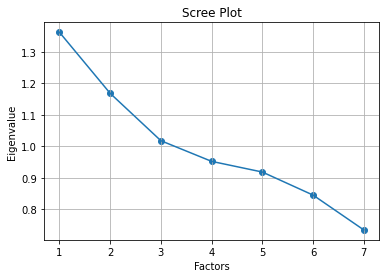

In [ ]:
plt.scatter(range(1,x_train.shape[1]+1),eigen_values)
plt.plot(range(1,x_train.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa = FactorAnalyzer()

fa.analyze(x_train, 3, rotation="oblimin", method='ml')


In [ ]:
fa.loadings

,Factor1,Factor2,Factor3
age,-0.004852,0.602823,-0.080538
gender,0.997618,0.000405,-0.000611
hand,0.035972,-0.021124,-0.039276
sleep,-0.022713,-0.371454,-0.244780
edu_level,-0.030475,0.297785,0.178009
commute_level,0.027796,-0.138420,0.389710
home_env,0.030059,-0.079344,0.115590


In [ ]:
fa.get_factor_variance()


,Factor1,Factor2,Factor3
SS Loadings,0.999681,0.615952,0.264869
Proportion Var,0.142812,0.087993,0.037838
Cumulative Var,0.142812,0.230805,0.268643


In [ ]:
fa.phi 

array([[ 1.        , -0.07294579,  0.15097097],
       [-0.07294579,  1.        , -0.08701442],
       [ 0.15097097, -0.08701442,  1.        ]])

In [ ]:
from factor_analyzer import (ConfirmatoryFactorAnalyzer,
...                              ModelSpecificationParser)

In [ ]:
model_dict = {"F1": ["gender"], "F2": ["age", "sleep"], "F3": ["commute_level"]}

In [ ]:
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(x_test, model_dict)

In [ ]:
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False)

In [ ]:
x_test2 = x_test.drop(['hand', 'edu_level', 'home_env' ],axis=1)
x_test2.head()

,age,gender,sleep,commute_level
164964,0.615385,1.0,0.545455,1.0
122320,0.846154,0.0,0.545455,0.5
593762,0.673077,0.0,0.545455,1.0
414139,0.442308,0.0,0.636364,0.5
614287,0.884615,1.0,0.545455,1.0


In [ ]:
cfa.fit(x_test2)

ConfirmatoryFactorAnalyzer(bounds=None, disp=False, impute='median',
                           is_cov_matrix=False, max_iter=200, n_obs=360672,
                           specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x7fdcb72ed310>,
                           tol=None)

In [ ]:
cfa.loadings_

array([[ 14.65829855,   0.        ,   0.        ],
       [  0.        ,  -3.77814198,   0.        ],
       [  0.        , -18.5289094 ,   0.        ],
       [  0.        ,   0.        ,  15.52481291]])

In [ ]:
cfa.factor_varcovs_

array([[ 1.        , -1.77341281,  3.14722542],
       [-1.77341281,  1.        , -2.3487513 ],
       [ 3.14722542, -2.3487513 ,  1.        ]])

In [ ]:
cfa.get_model_implied_cov()

array([[207.72745443,  98.2136106 , 481.66297155, 716.20572443],
       [ 98.2136106 ,  22.10936194,  70.00485041, 137.76588403],
       [481.66297155,  70.00485041, 351.79272106, 675.63675419],
       [716.20572443, 137.76588403, 675.63675419, 233.20487252]])

# Confirmatory Factor Analysis

In [ ]:
! pip install semopy

     |████████████████████████████████| 1.6 MB 8.4 MB/s 
  Created wheel for semopy: filename=semopy-2.3.8-py3-none-any.whl size=1657762 sha256=08ac0f87d026e17c39edb62cfe8ec67abe96233eb1034c2912d3060197458d86
  Stored in directory: /root/.cache/pip/wheels/3c/d2/37/1f3c77633ab4bb7ed196e153f77b1cc719ecd510cb75a4baef
Successfully built semopy


In [ ]:
from semopy import Model
from semopy import calc_stats, semplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# old model
mod = """
        Factor1 =~ navigating_skills
        Factor2 =~ age
        Factor3 =~ sleep + commute_level
      """

In [ ]:
mod = """
        Factor1 =~ gender
        Factor2 =~ age + sleep
        Factor3 =~ commute_level
      """

In [ ]:
mod = """
        Factor1 =~ gender
        Factor2 =~ age + sleep + edu_level
        Factor3 =~ commute_level
      """

In [ ]:
m = Model(mod)
res = m.fit(x_test2) # , obj="MLW", solver="SLSQP"
stats = calc_stats(m)
print(stats.T)

                      Value
DoF               -1.000000
DoF Baseline       6.000000
chi2            2178.378708
chi2 p-value            NaN
chi2 Baseline  26551.411354
CFI                0.917900
GFI                0.917956
AGFI               1.492263
NFI                0.917956
TLI                1.492600
RMSEA                   NaN
AIC               21.987920
BIC              140.740887
LogLik             0.006040


/usr/local/lib/python3.7/dist-packages/semopy/stats.py:386: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((chi2 / dof - 1) / (model.n_samples - 1))


In [ ]:
m = Model(mod)
res = m.fit(x_test2) # , obj="MLW", solver="SLSQP"
stats = calc_stats(m)
print(stats.T)

                      Value
DoF               -1.000000
DoF Baseline       6.000000
chi2            2178.378708
chi2 p-value            NaN
chi2 Baseline  26551.411354
CFI                0.917900
GFI                0.917956
AGFI               1.492263
NFI                0.917956
TLI                1.492600
RMSEA                   NaN
AIC               21.987920
BIC              140.740887
LogLik             0.006040


/usr/local/lib/python3.7/dist-packages/semopy/stats.py:386: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((chi2 / dof - 1) / (model.n_samples - 1))


In [ ]:
# get covariance matrix
cov_m = m.inspect(mode='mx')['Psi']
print(cov_m)

          Factor1   Factor2   Factor3
Factor1  0.087340 -0.008904  0.018892
Factor2 -0.008904  0.087816 -0.015956
Factor3  0.018892 -0.015956  0.069680


In [ ]:
# get covariance matrix
cov_m = m.inspect(mode='mx')['Psi']
print(cov_m)

          Factor1   Factor2   Factor3
Factor1  0.105579 -0.008524  0.019131
Factor2 -0.008524  0.057753 -0.014430
Factor3  0.019131 -0.014430  0.069051


In [ ]:
#pd.DataFrame(np.corrcoef(factors.T), columns = ['Factor1', 'Factor2', 'Factor3'], index = ['Factor1', 'Factor2', 'Factor3'])

In [ ]:
estimates = m.inspect()

estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,gender,~,Factor1,1.000000,-,-,-
1,age,~,Factor2,1.000000,-,-,-
2,sleep,~,Factor2,-0.078360,0.00464012,-16.8874,0
3,commute_level,~,Factor3,1.000000,-,-,-
4,Factor3,~~,Factor3,0.069680,0.000185271,376.095,0
5,Factor3,~~,Factor1,0.018892,0.00033139,57.0084,0
6,Factor3,~~,Factor2,-0.015956,0.000197531,-80.7771,0
7,Factor1,~~,Factor1,0.087340,0.000293703,297.375,0
8,Factor1,~~,Factor2,-0.008904,0.000246891,-36.0629,0
9,Factor2,~~,Factor2,0.087816,0.0051502,17.051,0


In [ ]:
g = semplot(m, "/content/drive/My Drive/SHQ/Data/e-cfa.png")

# get factor score

In [ ]:
from factor_analyzer import FactorAnalyzer


In [ ]:
fa = FactorAnalyzer()
#fa.set_params(n_factors='blahblahblah!', rotation='refer the docs')

fa.analyze(df, n_factors=3, rotation="oblimin", method='ml')
#fa.fit(df)
#fa.transform(df)

In [ ]:
factor_scores = fa.get_scores(df)
factor_scores

,Factor1,Factor2,Factor3
0,-1.043892,1.139645,-0.700289
1,0.957154,-1.034636,0.654426
2,-1.041553,-0.346103,0.186113
3,0.954573,0.501439,0.451959
4,0.952795,1.074199,-0.403255
...,...,...,...
721338,0.955438,0.341113,0.298009
721339,0.953644,0.941057,-0.042250
721340,-1.043231,0.716170,-0.705603
721341,0.955248,0.536877,0.770695


In [ ]:
factor_scores['navigating_skills_scaled'] = df2['navigating_skills']
factor_scores['navigating_skills'] = df0['navigating_skills']
factor_scores

,Factor1,Factor2,Factor3,navigating_skills_scaled,navigating_skills
0,-1.043892,1.139645,-0.700289,0.333333,1
1,0.957154,-1.034636,0.654426,1.000000,3
2,-1.041553,-0.346103,0.186113,0.666667,2
3,0.954573,0.501439,0.451959,1.000000,3
4,0.952795,1.074199,-0.403255,0.666667,2
...,...,...,...,...,...
721338,0.955438,0.341113,0.298009,0.666667,2
721339,0.953644,0.941057,-0.042250,0.666667,2
721340,-1.043231,0.716170,-0.705603,1.000000,3
721341,0.955248,0.536877,0.770695,0.666667,2


In [ ]:
factor_scores.to_csv('/content/drive/My Drive/SHQ/Data/factor_scores.csv', index=False)

In [ ]:
factor_scores = pd.read_csv('/content/drive/My Drive/SHQ/Data/factor_scores.csv')

In [ ]:
factor_scores

,Factor1,Factor2,Factor3,navigating_skills_scaled,navigating_skills
0,-1.043892,1.139645,-0.700289,0.333333,1
1,0.957154,-1.034636,0.654426,1.000000,3
2,-1.041553,-0.346103,0.186113,0.666667,2
3,0.954573,0.501439,0.451959,1.000000,3
4,0.952795,1.074199,-0.403255,0.666667,2
...,...,...,...,...,...
721338,0.955438,0.341113,0.298009,0.666667,2
721339,0.953644,0.941057,-0.042250,0.666667,2
721340,-1.043231,0.716170,-0.705603,1.000000,3
721341,0.955248,0.536877,0.770695,0.666667,2
